In [1]:
from lime_exlpain import Seq2SeqLimeExplainer
from model_layer.model_hub import *
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
plt.rcParams['font.family'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False
import joblib

import sys
sys.path.append("../")
import xfinai_config
from utils import base_io

## 0 Create Explainer

In [2]:
future_index = 'IC'
encoder_class = EncoderGRU
decoder_class = AttnDecoderGRU
model_name = f"{EncoderGRU.name}_{AttnDecoderGRU.name}"
params = base_io.load_best_params(future_index, model_name)
lime_explainer = Seq2SeqLimeExplainer(future_index=future_index, encoder_class=encoder_class,
                                 decoder_class=decoder_class, params=params)

W0419 00:03:27.775803 13692 warnings.py:109] D:\Anaconda\envs\nni\lib\site-packages\torch\nn\modules\rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.20851863452617508 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "

I0419 00:03:30.404116 13692 base_io.py:86] Loading encoder state, model_path: D:/projects/XFinAI/model_layer/trained_models/IC/EncoderGRU_AttnDecoderGRU/EncoderGRU.pth
I0419 00:03:30.494104 13692 base_io.py:90] Loading decoder state, model_path: D:/projects/XFinAI/model_layer/trained_models/IC/EncoderGRU_AttnDecoderGRU/AttnDecoderGRU.pth


## 1 Load Data

In [22]:
raw_prediction_map = joblib.load('../result/raw_prediction/IC/EncoderGRU_AttnDecoderGRU/raw_prediction_map.pkl')
train_data, val_data, test_data = base_io.load_data("IC")
test_pred = raw_prediction_map['测试集']
test_real = lime_explainer.test_y.squeeze()[:test_pred.shape[0]]
test_data = test_data.iloc[:test_pred.shape[0]]

In [14]:
pred_diff = test_pred - test_real 

## 2 Explain Max Diff

In [24]:
max_diff_index = pred_diff.argmax()
print(f"max_diff_index{[max_diff_index]} pred {test_pred[max_diff_index]} real{test_real[max_diff_index]} time {test_data.index[max_diff_index]}")

max_diff_index[473] pred -7.009741966612637e-05 real-0.004869772848660081 time 2022-03-22 13:17:00


In [6]:
max_diff_explain = lime_explainer.explainer.explain_instance(lime_explainer.test_x[max_diff_index], lime_explainer.prediction_func,
                                                  num_features=lime_explainer.num_feature, num_samples=lime_explainer.num_samples)

In [7]:
max_diff_explain.show_in_notebook()

In [9]:
max_diff_explain.as_list()

[('BOP_t-0', 4.566722225493108e-05),
 ('MFI_90tick_t-0', 4.432492217123779e-05),
 ('DX_90tick_t-0', -3.606607927059398e-05),
 ('ADX_90tick_t-0', -3.563401262611562e-05),
 ('MFI_30tick_t-0', 3.096902278910791e-05),
 ('AROONOSC_5tick_t-0', 2.505109369572191e-05),
 ('AROONOSC_365tick_t-0', 2.3572364386207613e-05),
 ('DX_30tick_t-0', 1.982968151948284e-05),
 ('MFI_10tick_t-0', 1.71985224123259e-05),
 ('volume_t-0', -1.350562343970521e-05)]

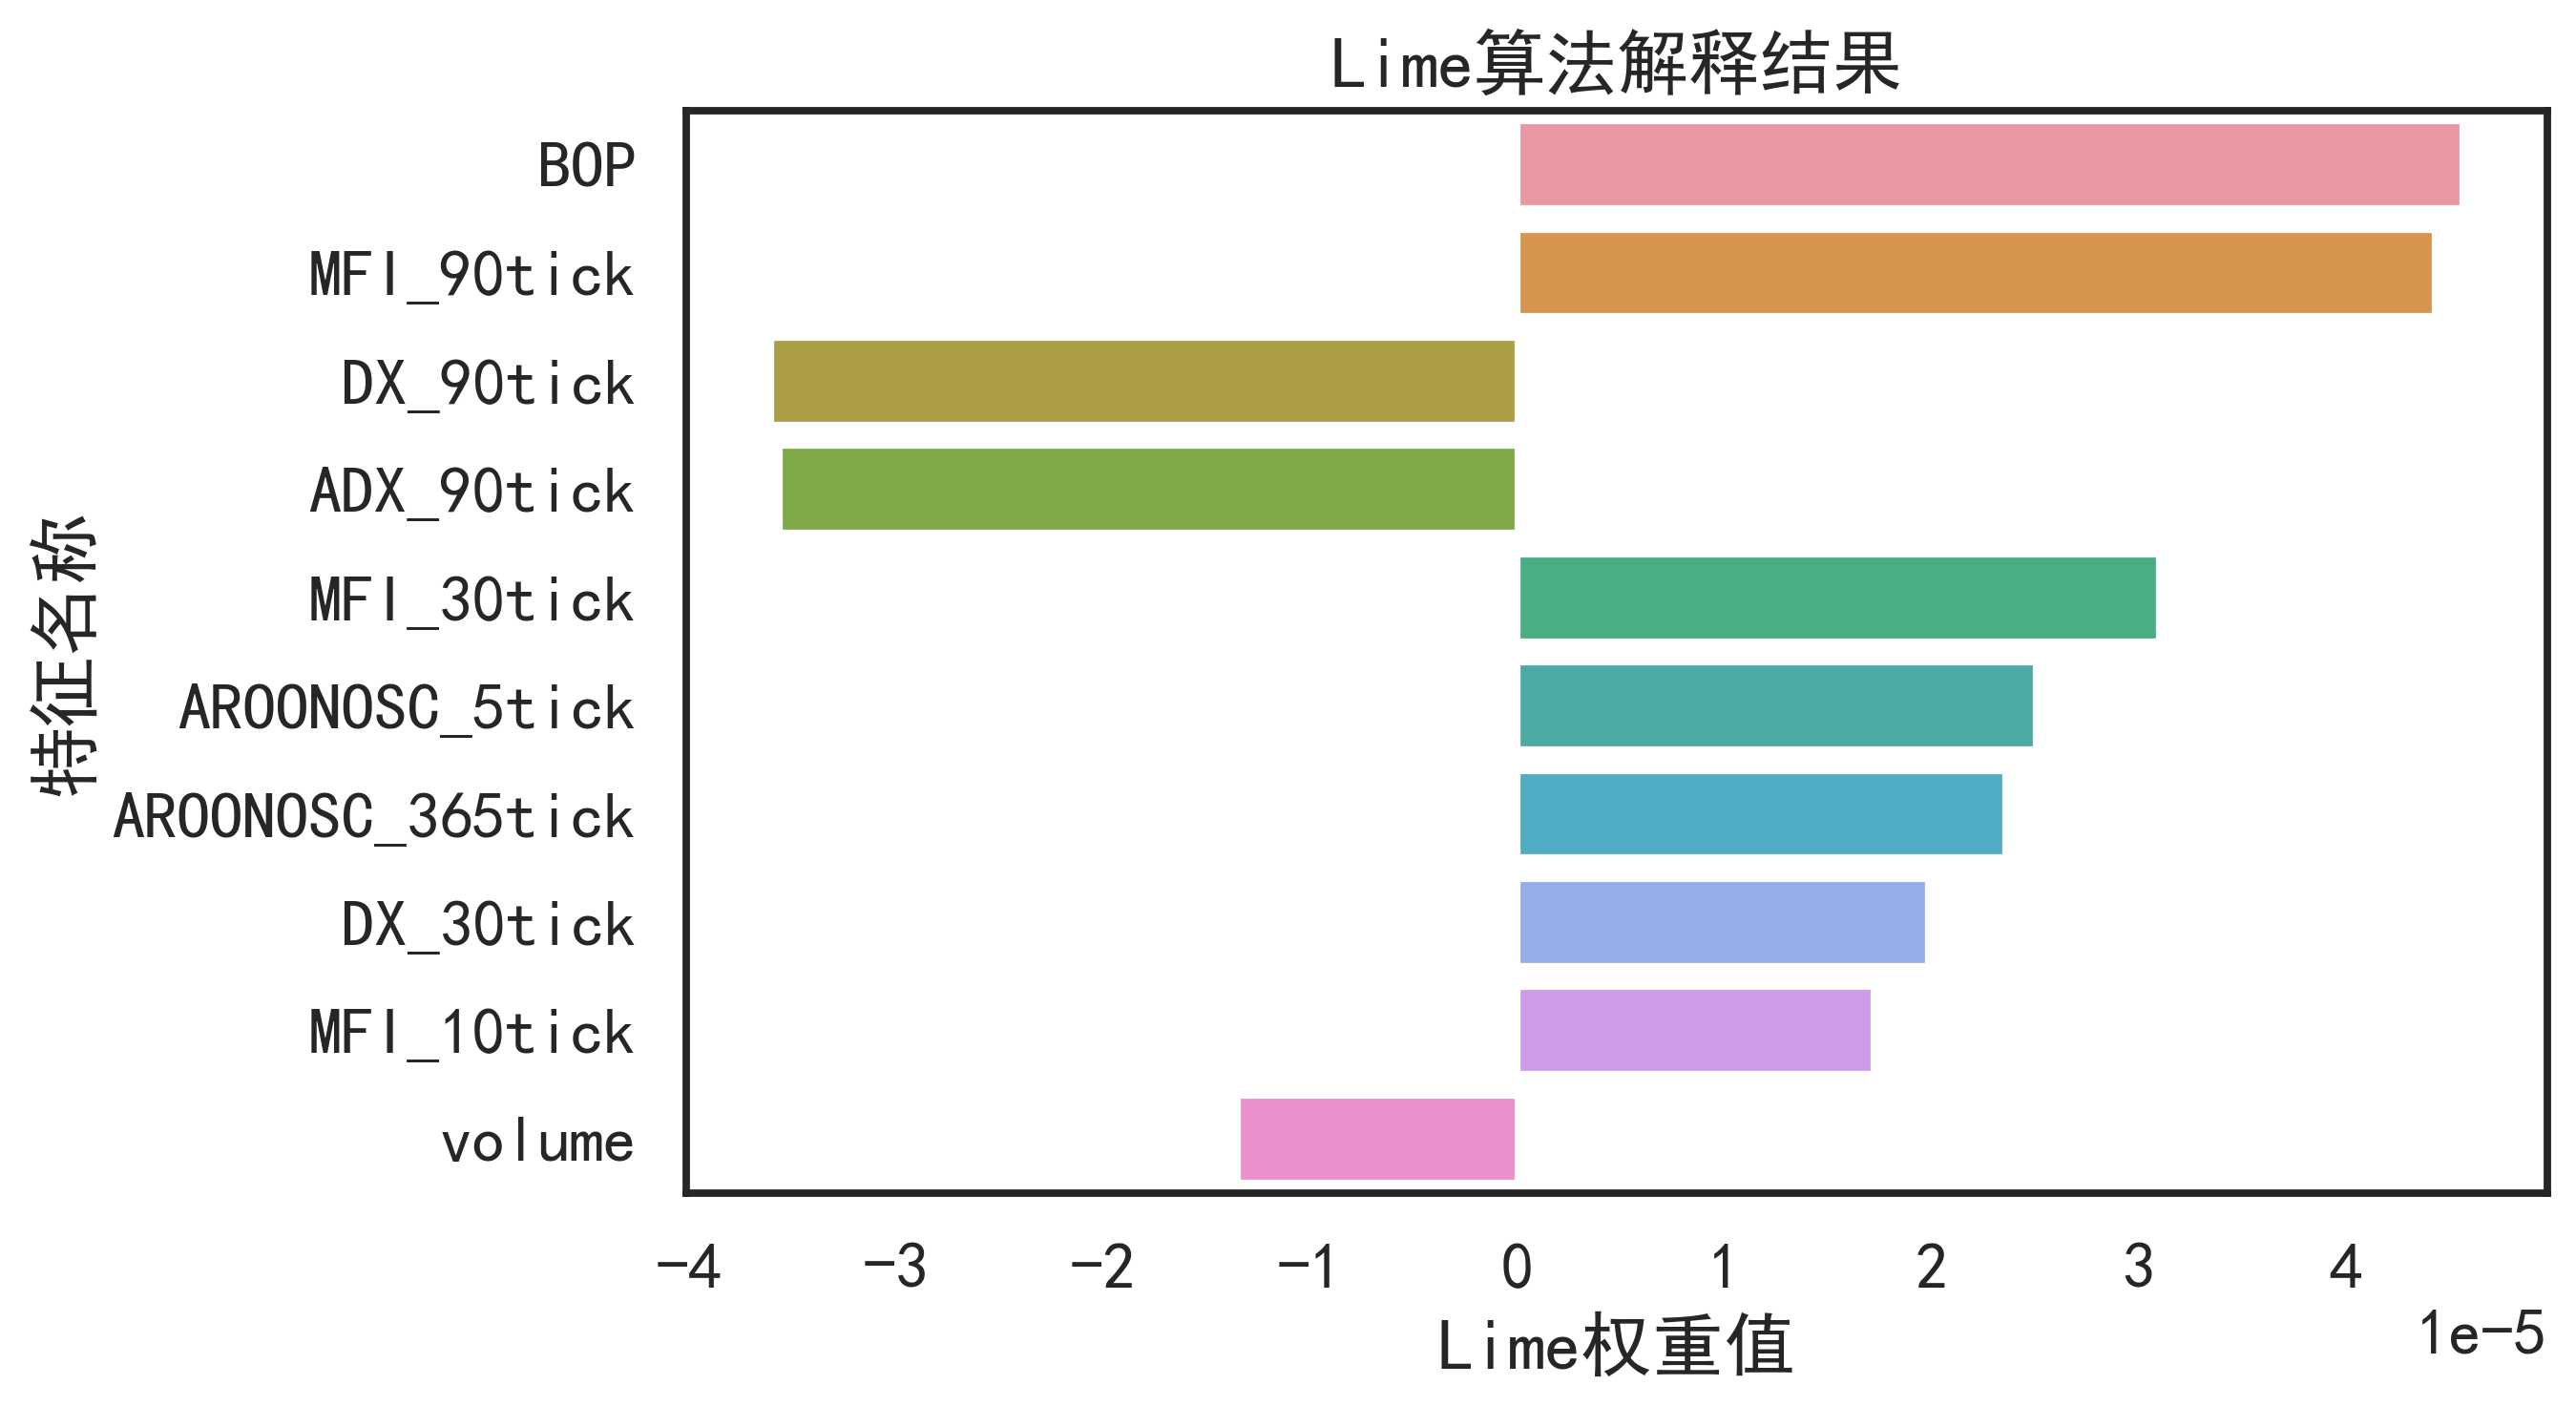

In [8]:
lime_explainer.save_lime_result(max_diff_explain, tag='max_pred_diff')

## 3 Explain Other

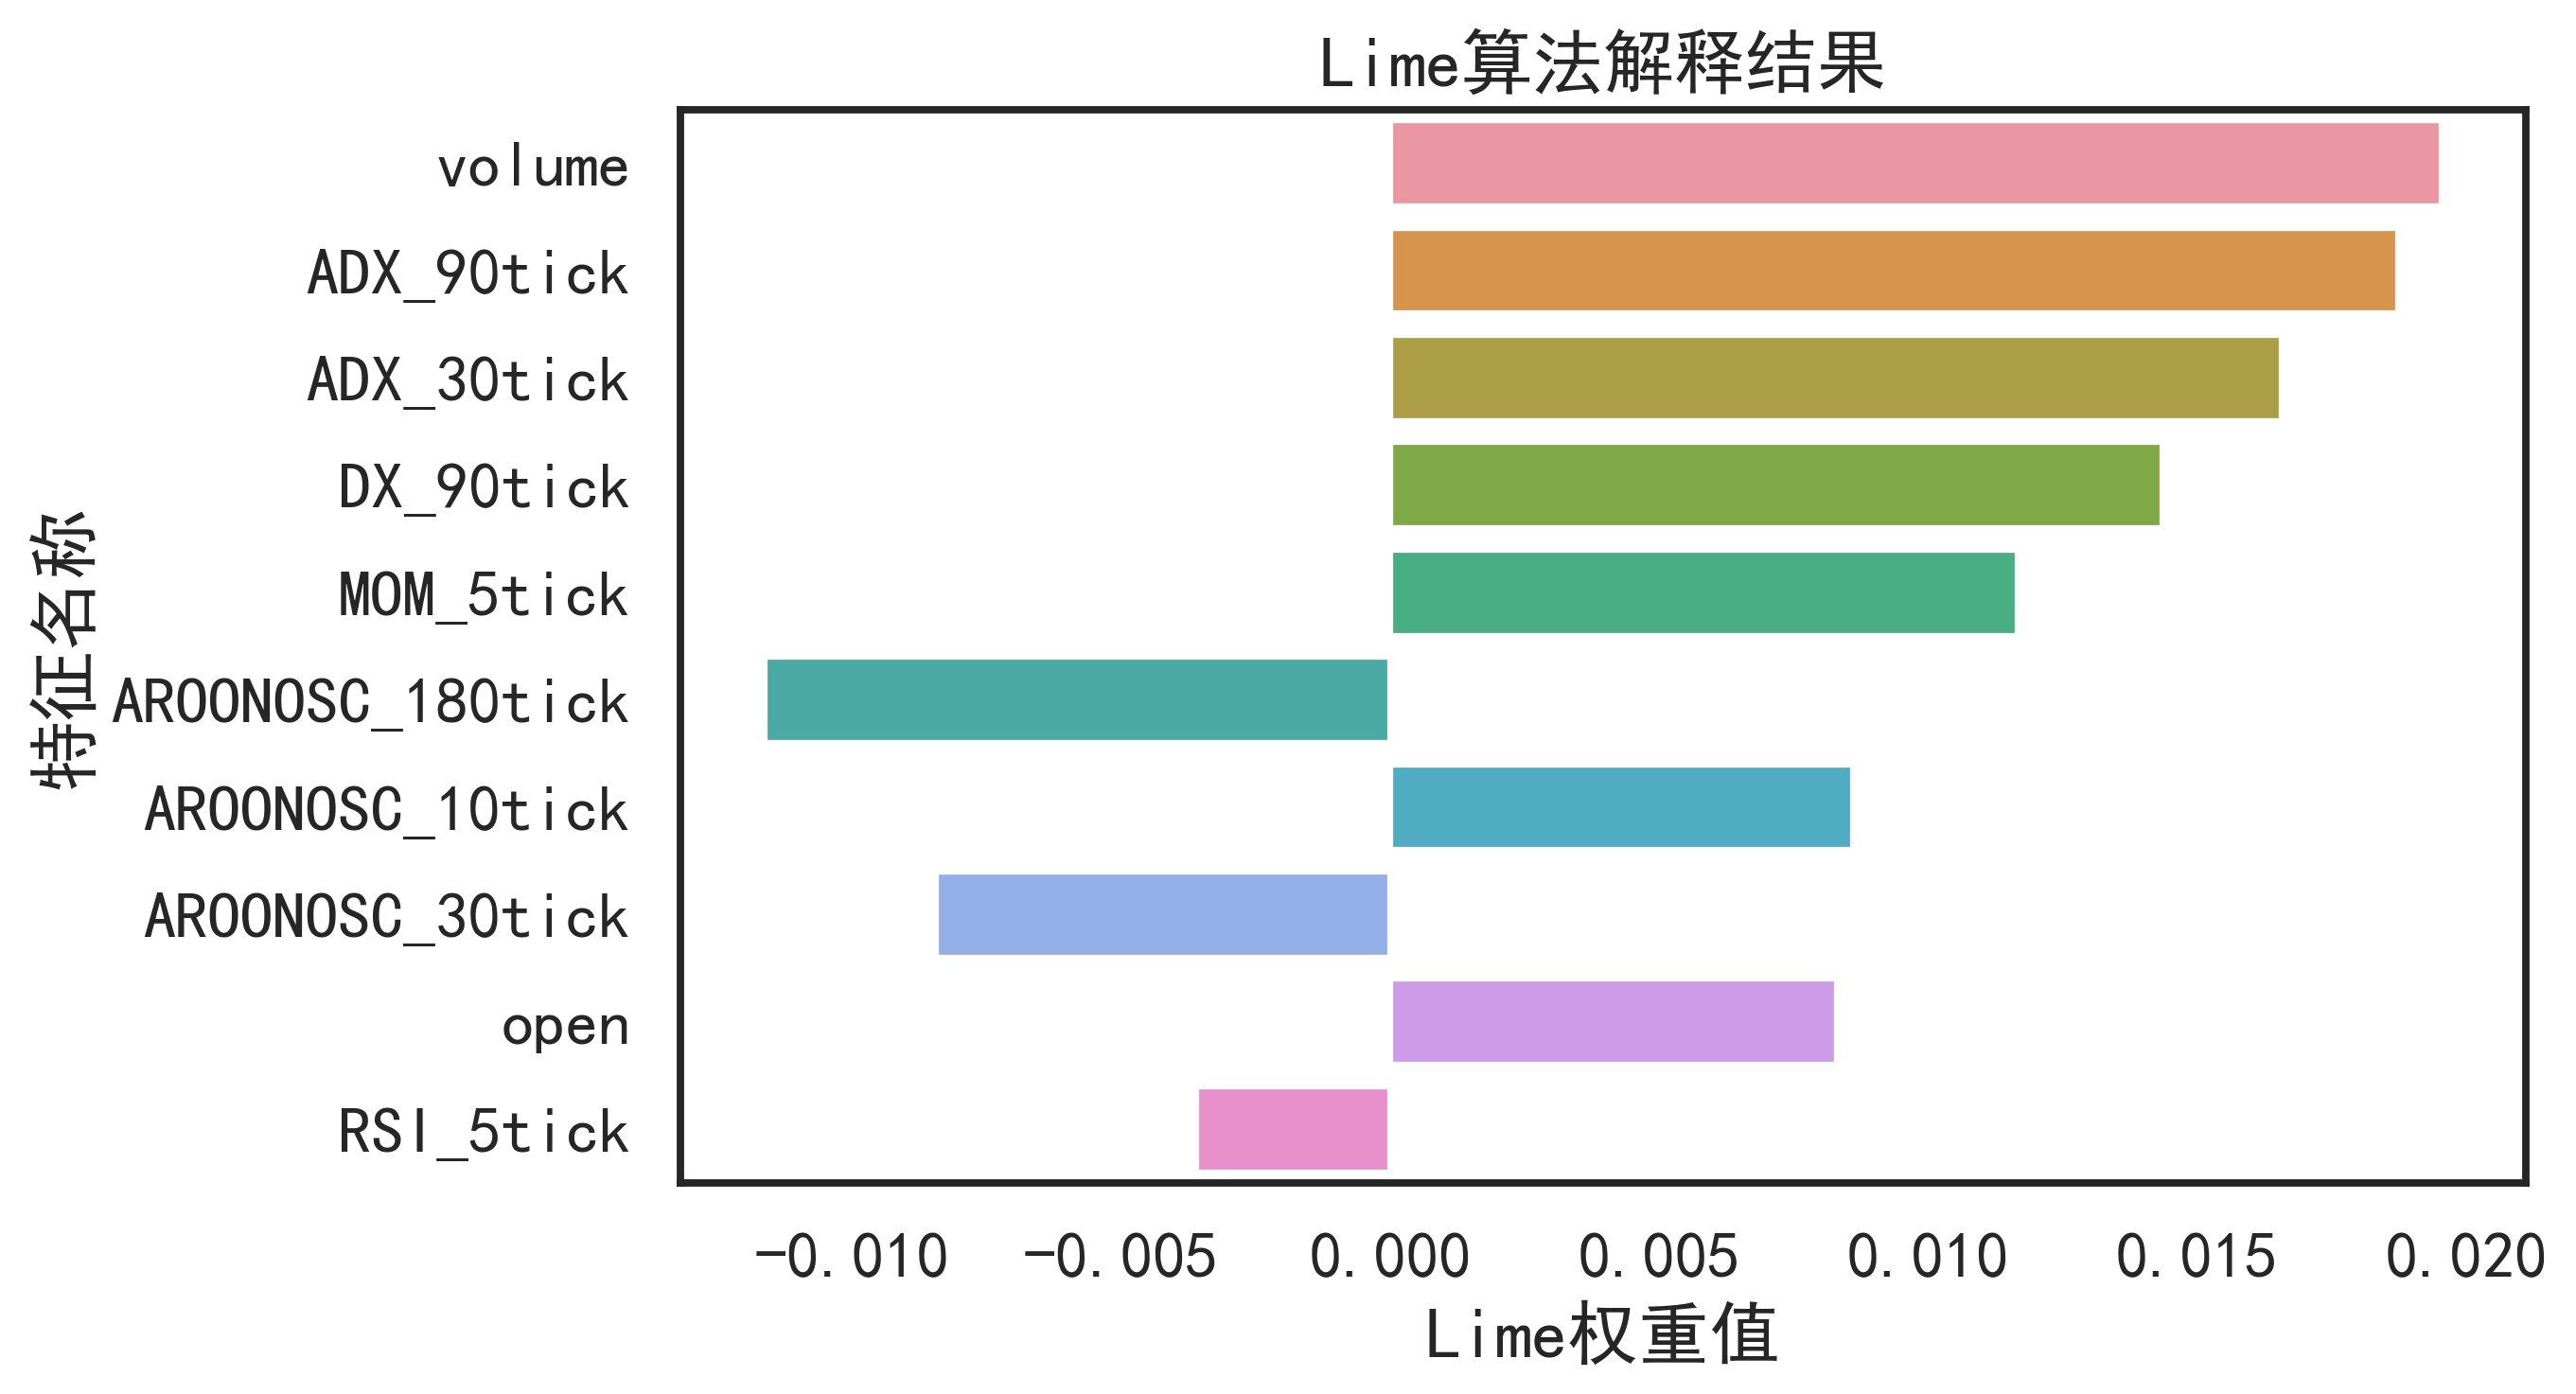

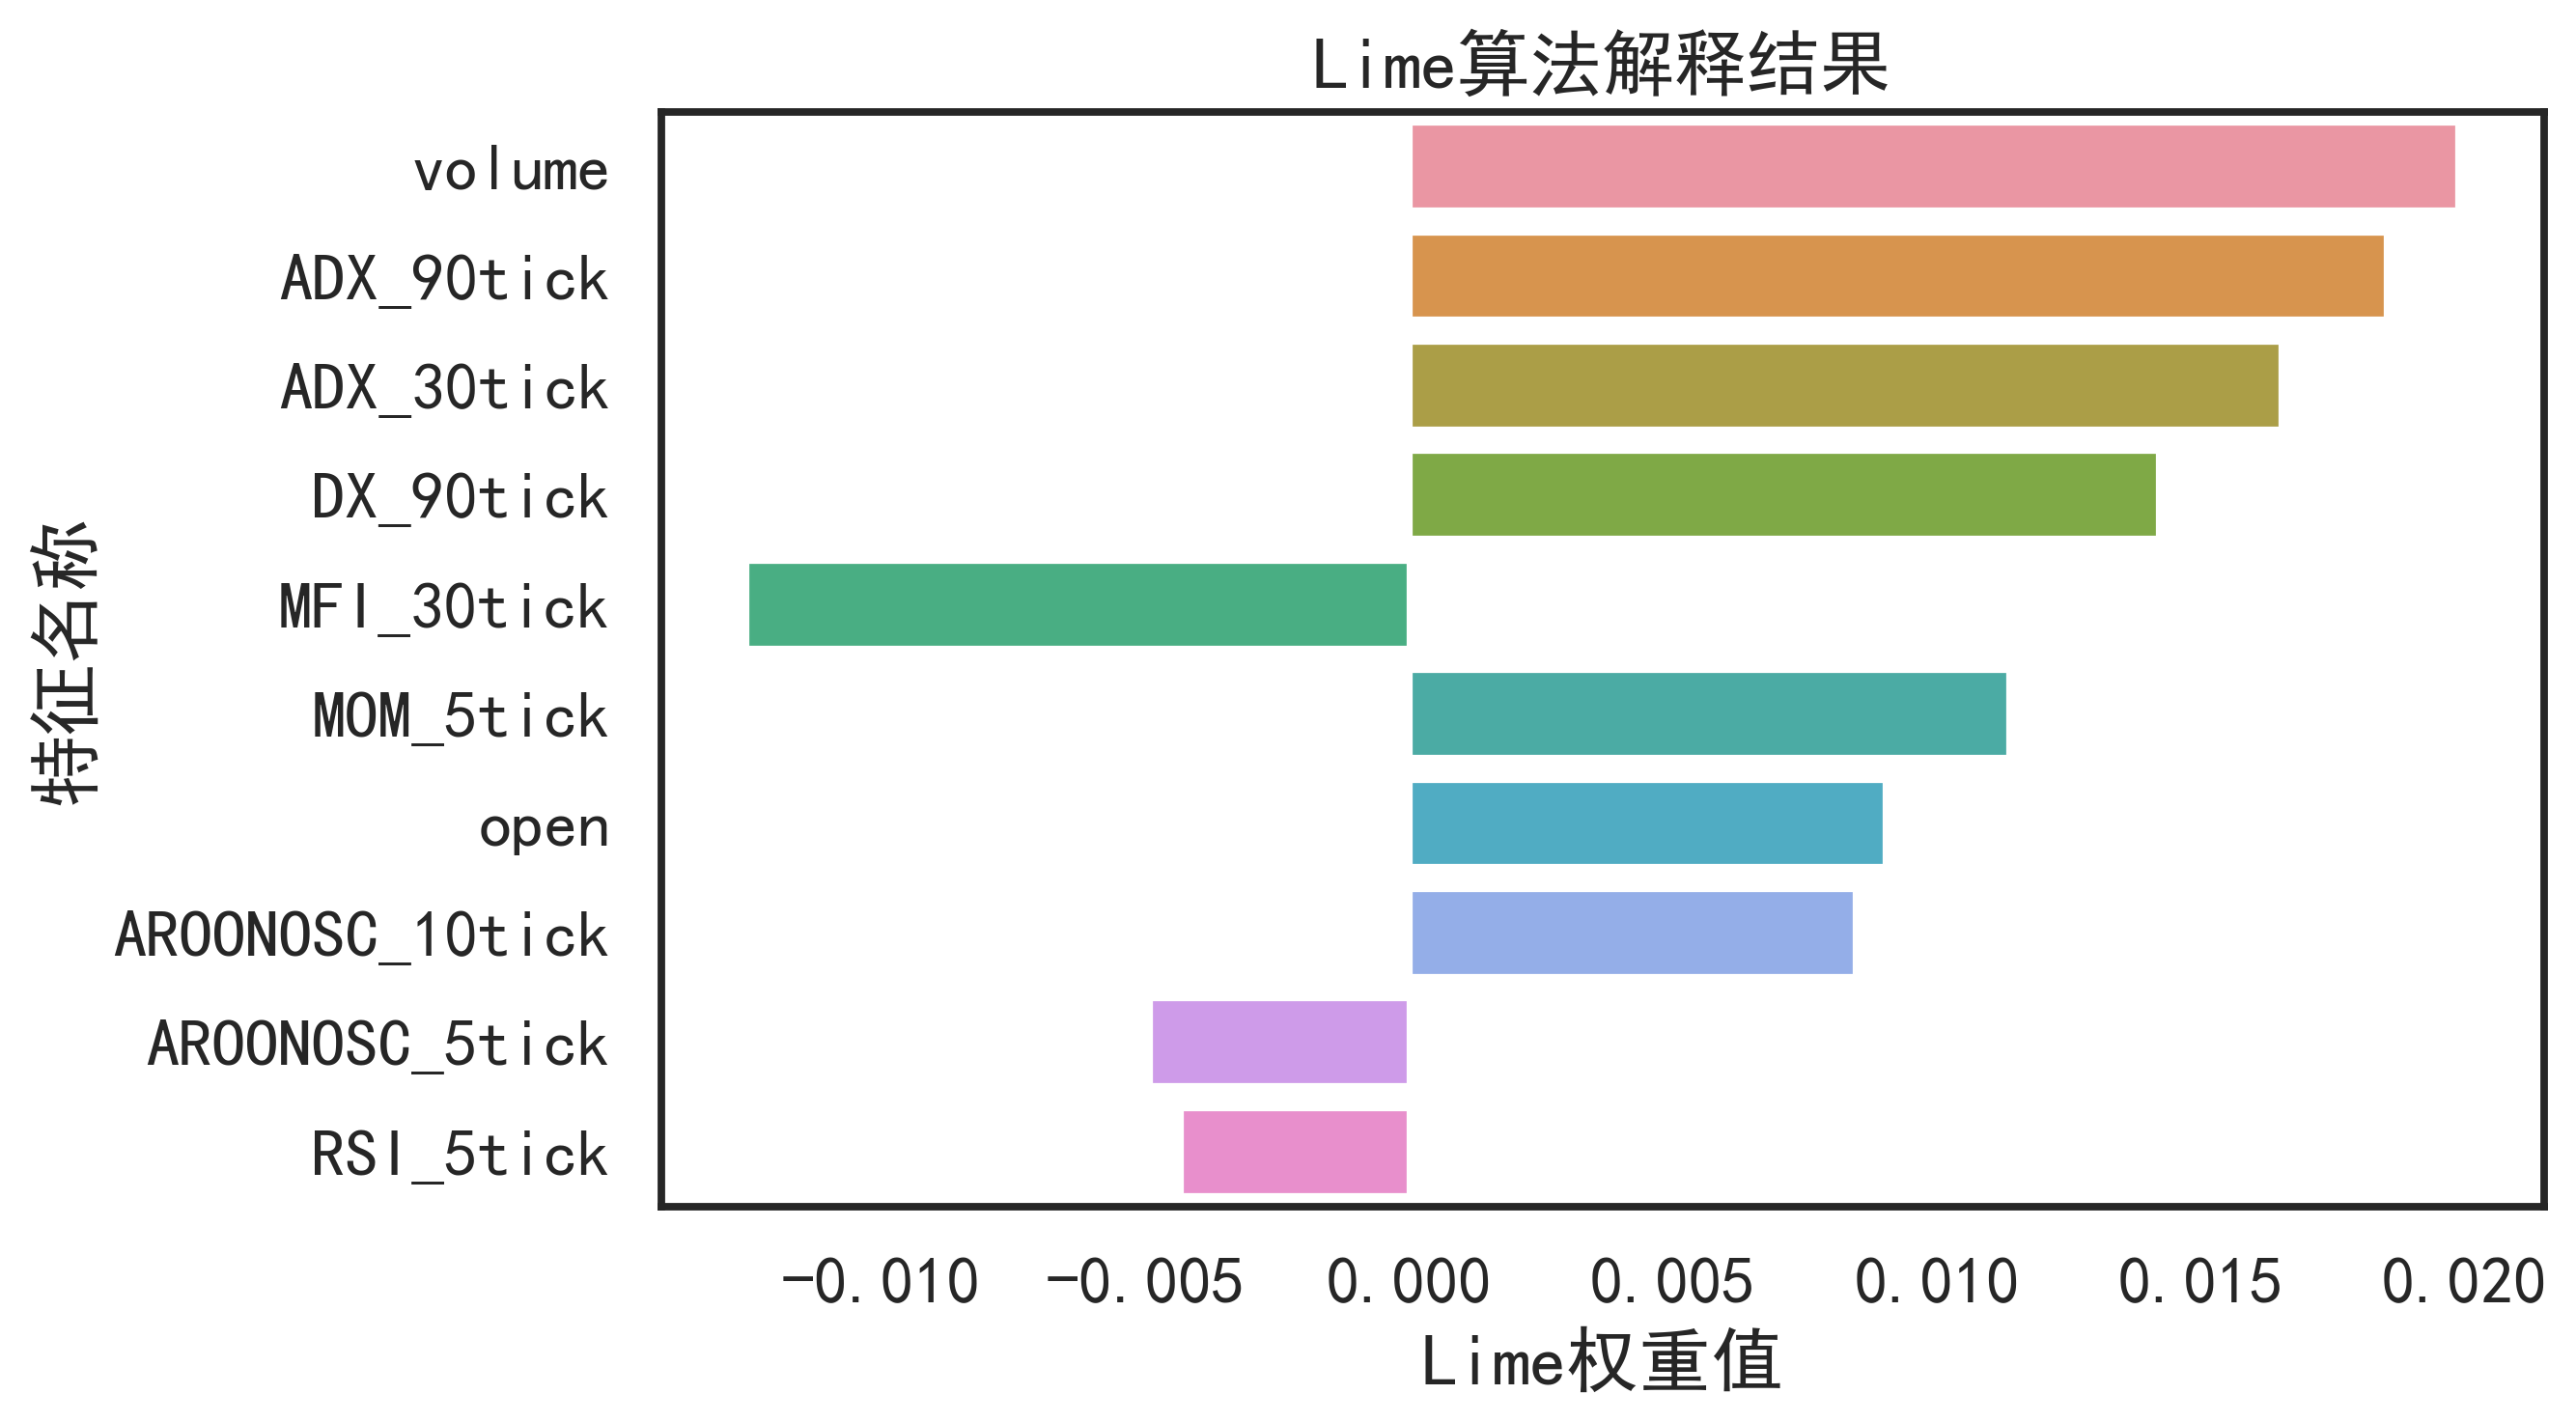

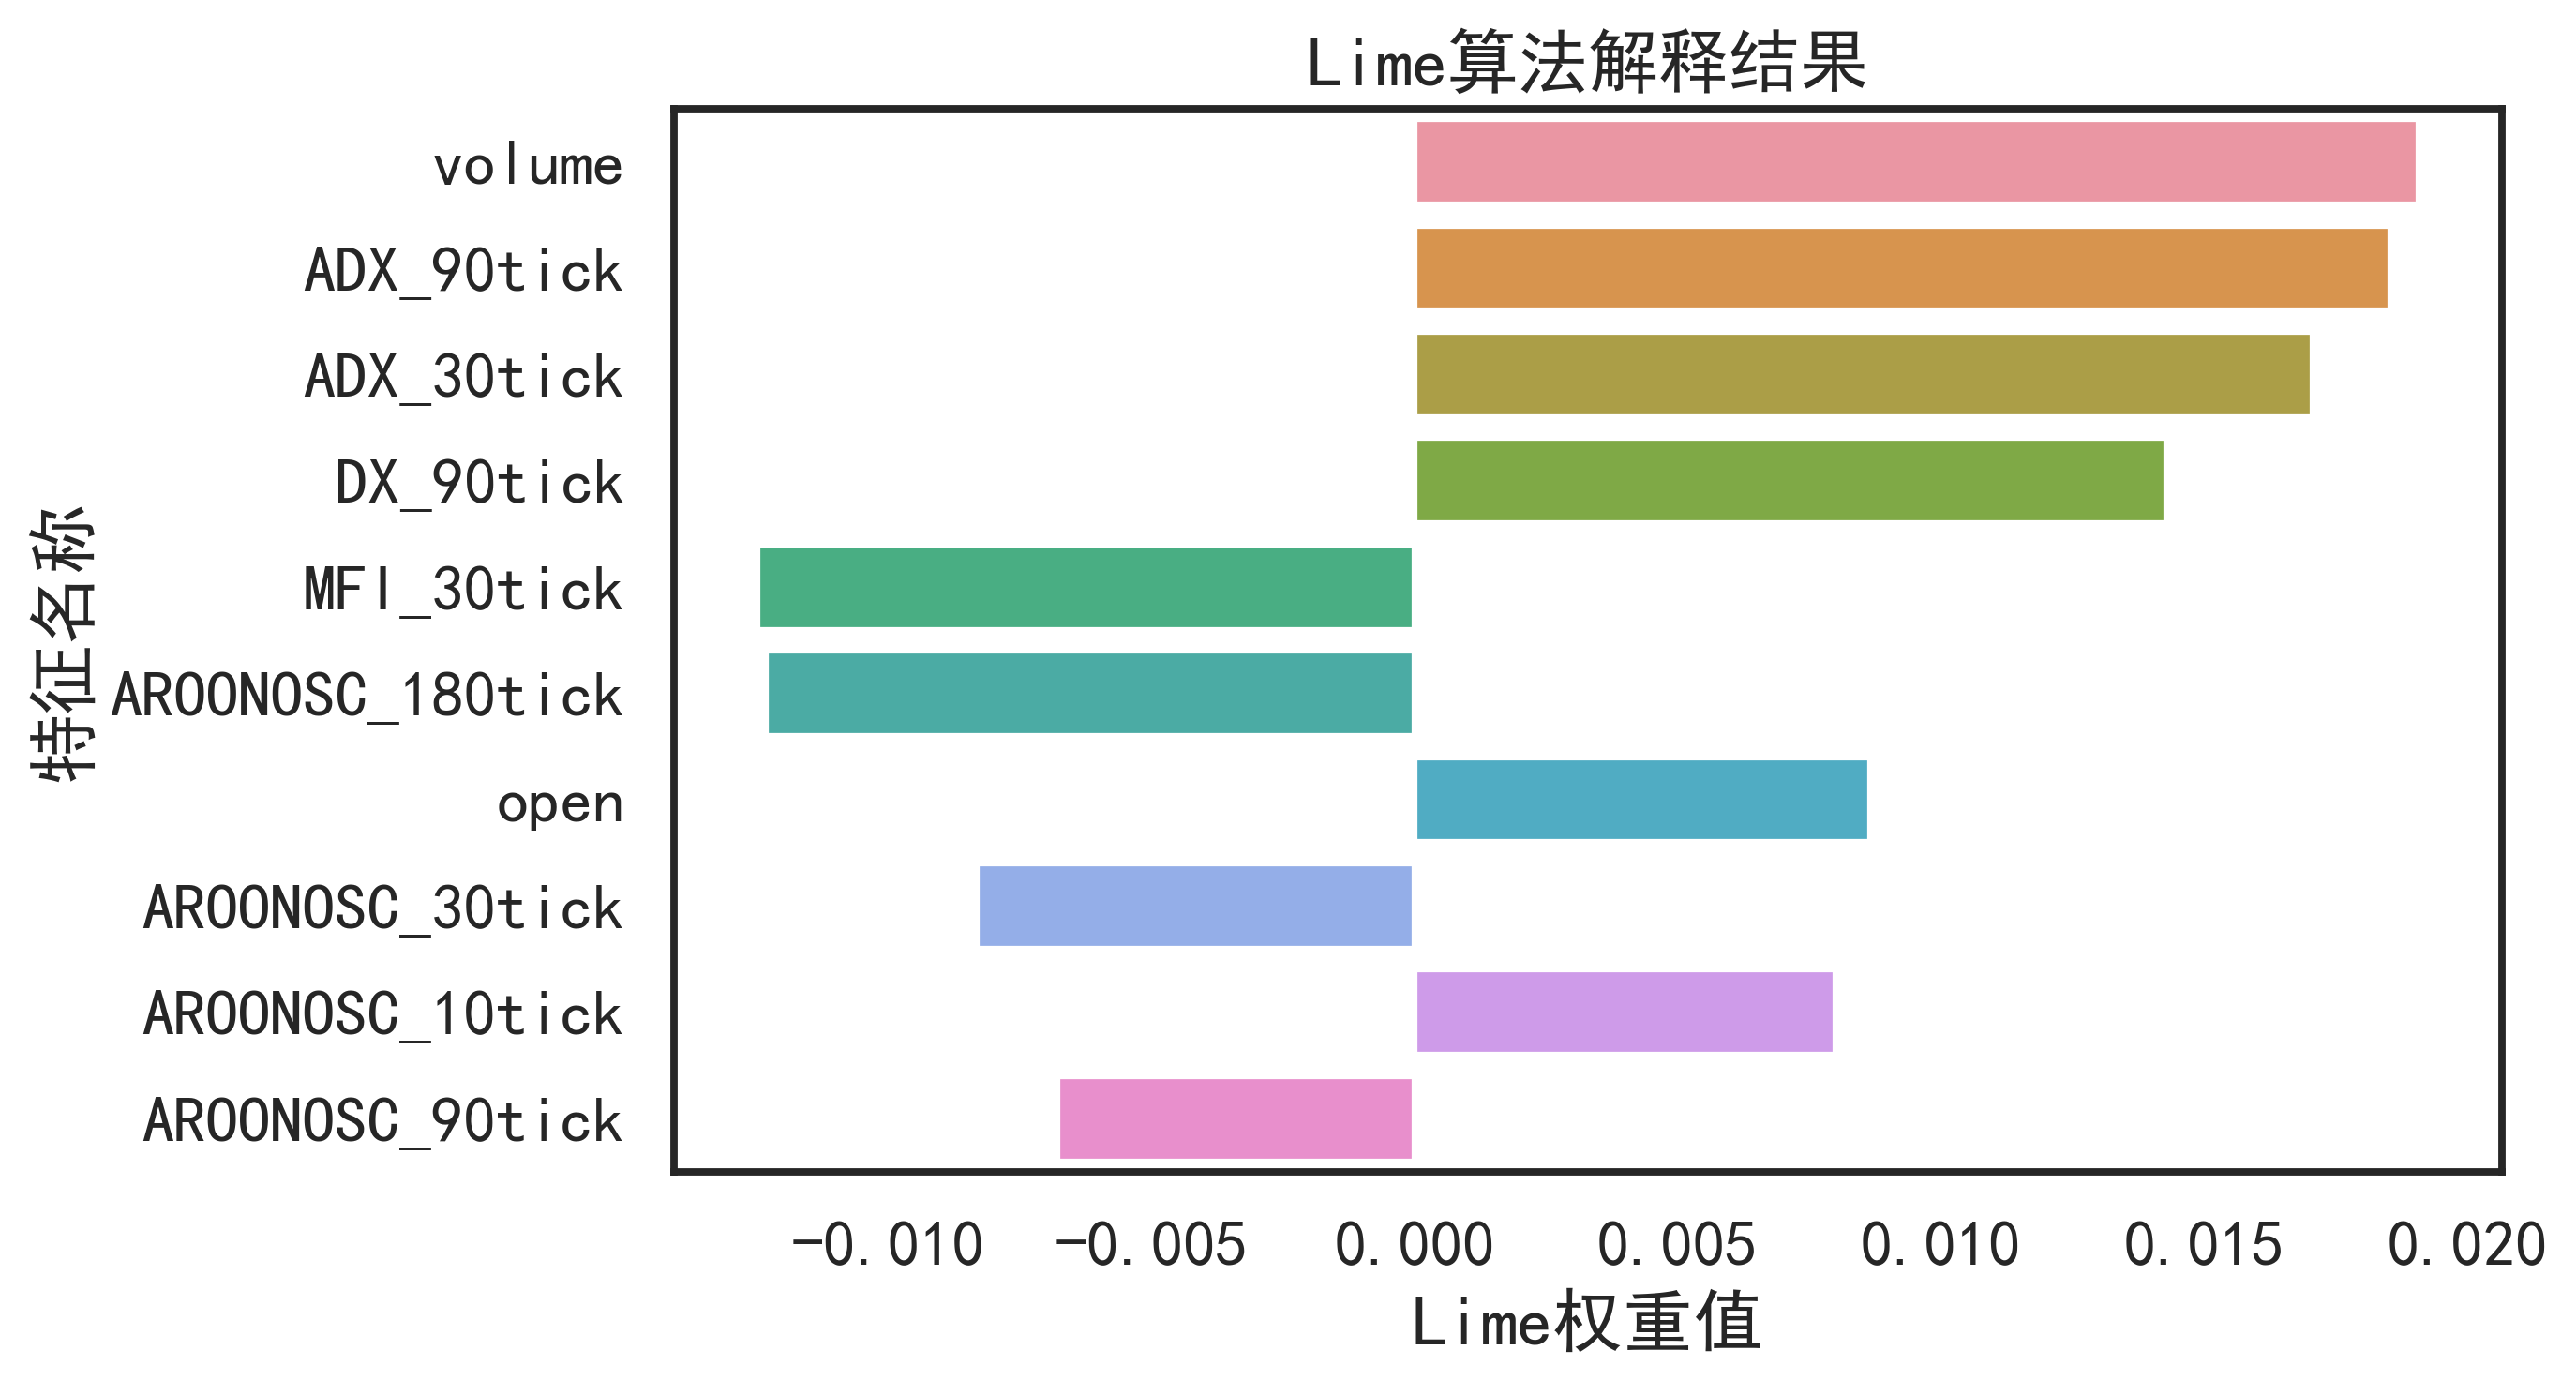

In [3]:
random_explain, max_explain, min_explain = lime_explainer.run_lime_explain()

In [14]:
random_explain.show_in_notebook()

In [15]:
max_explain.show_in_notebook()

In [16]:
min_explain.show_in_notebook()